# Importing the libraries

In [7]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import imutils
import keras
import matplotlib.pyplot as plt

# Loading the neural network

In [17]:

network = keras.models.load_model("network.keras", compile=False)
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,428 (700.89 KB)

 Trainable params: 179,428 (700.89 KB)

 Non-trainable params: 0 (0.00 B)

# Loading the test image

(-0.5, 729.5, 284.5, -0.5)

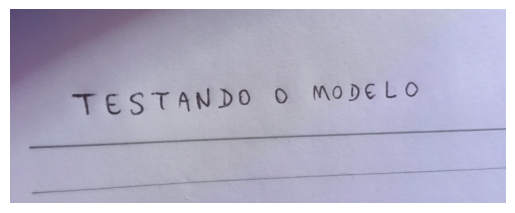

In [21]:
img = cv2.imread('Images//test-manuscript01.jpg')
plt.imshow(img)
plt.axis("off")

(-0.5, 729.5, 284.5, -0.5)

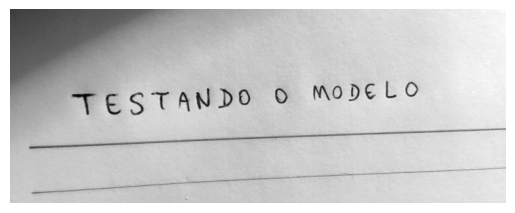

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis("off")

# Pre-processing the image

(-0.5, 729.5, 284.5, -0.5)

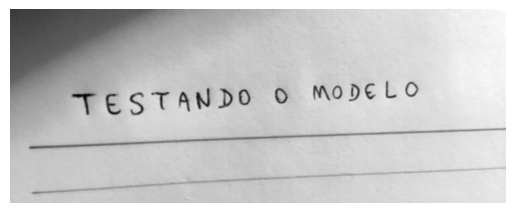

In [19]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
plt.imshow(blur, cmap='gray')
plt.axis("off")

(-0.5, 729.5, 284.5, -0.5)

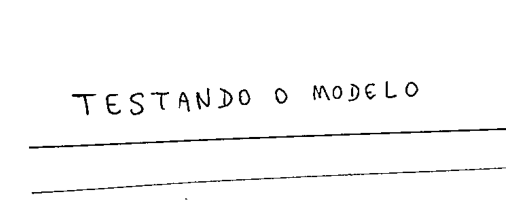

In [20]:
adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
plt.imshow(adaptive, cmap='gray')
plt.axis("off")

(-0.5, 729.5, 284.5, -0.5)

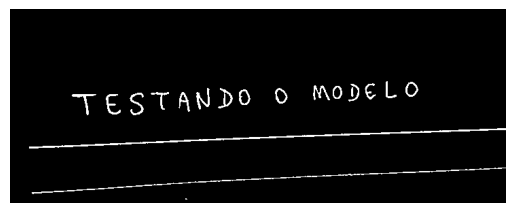

In [22]:
invertion = 255 - adaptive
plt.imshow(invertion, cmap='gray')
plt.axis("off")

(-0.5, 729.5, 284.5, -0.5)

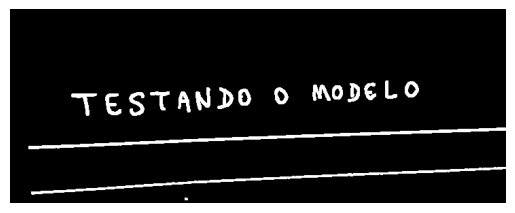

In [24]:
dilation = cv2.dilate(invertion, np.ones((3,3)))
plt.imshow(dilation, cmap='gray')
plt.axis("off")

(-0.5, 729.5, 284.5, -0.5)

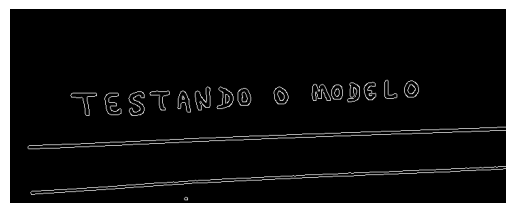

In [25]:
edges = cv2.Canny(dilation, 40, 150)
plt.imshow(edges, cmap='gray')
plt.axis("off")

(-0.5, 729.5, 284.5, -0.5)

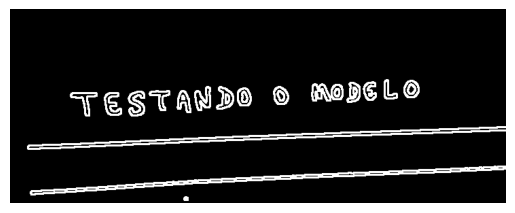

In [26]:
dilation = cv2.dilate(edges, np.ones((3,3)))
plt.imshow(dilation, cmap='gray')
plt.axis("off")

# Contour detection